<a href="https://www.kaggle.com/code/mh0386/digit-recognizer" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
try:
    train = pd.read_csv('Data/train.csv')
    test = pd.read_csv('Data/test.csv')
except:
    train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
    test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = np.array(test)
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
y = train['label']
X = train.drop('label', axis=1)

In [7]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
X = X/255
test = test/255

In [10]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
h = model.fit(
    X, 
    y, 
    epochs=40,
    validation_split=0.2
)

Epoch 1/40
1050/1050 [==============================] - 6s 5ms/step - loss: 0.3200 - accuracy: 0.9086 - val_loss: 0.1782 - val_accuracy: 0.9486
Epoch 2/40
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1440 - accuracy: 0.9582 - val_loss: 0.1389 - val_accuracy: 0.9585
Epoch 3/40
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0988 - accuracy: 0.9717 - val_loss: 0.1174 - val_accuracy: 0.9639
Epoch 4/40
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0736 - accuracy: 0.9780 - val_loss: 0.1046 - val_accuracy: 0.9683
Epoch 5/40
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0550 - accuracy: 0.9842 - val_loss: 0.0965 - val_accuracy: 0.9692
Epoch 6/40
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0428 - accuracy: 0.9872 - val_loss: 0.0985 - val_accuracy: 0.9702
Epoch 7/40
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 0.1044 - val_accuracy:

In [13]:
y_pred = model.predict(test)

875/875 [==============================] - 2s 2ms/step


In [14]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [15]:
model.evaluate(test, y_pred)

875/875 [==============================] - 2s 2ms/step - loss: 0.0081 - accuracy: 1.0000


[0.008055347017943859, 1.0]

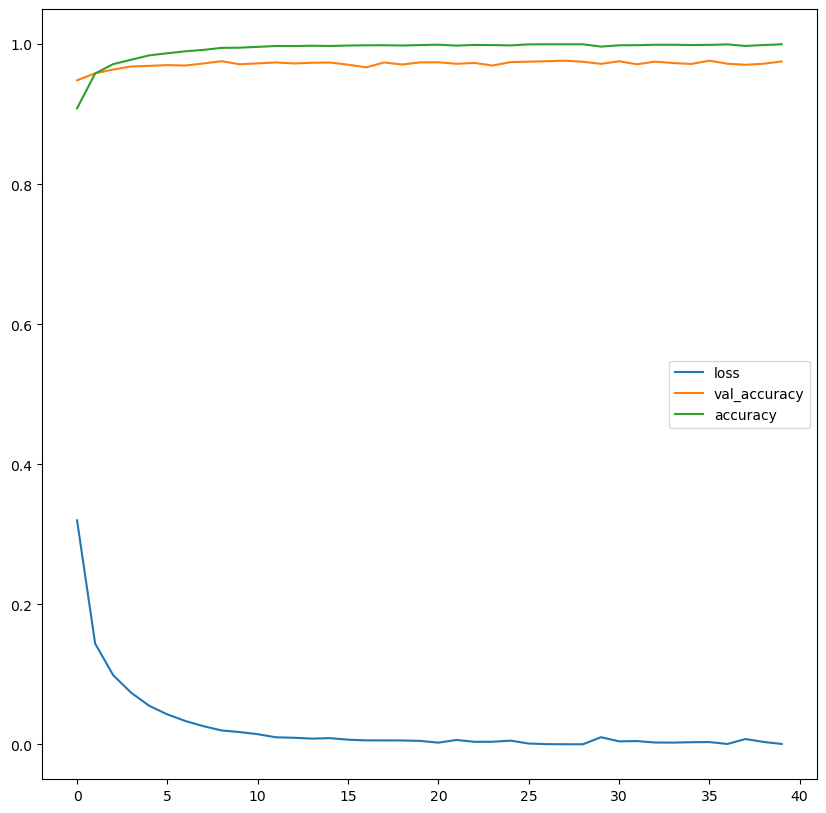

In [16]:
plt.figure(figsize=(10, 10))
plt.plot(h.history['loss'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['accuracy'])
plt.legend(['loss', 'val_accuracy', 'accuracy'])
plt.show()

In [17]:
submission = pd.DataFrame(
    {
        'ImageId': range(1, len(y_pred) + 1),
        'Label': y_pred
    }
)
submission.to_csv('submission.csv', index=False)

In [18]:
model.save('Model/model.keras')